In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"E:\Abilash\Learn\Data Science\Acadglid\Proj3\adult.data",
                   names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])

testdata= pd.read_csv(r"E:\Abilash\Learn\Data Science\Acadglid\Proj3\adult.test",
                   names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])



In [3]:
data = data.append(testdata)

In [4]:
data.head()

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
data.label.unique()

array([' <=50K', ' >50K', nan, ' <=50K.', ' >50K.'], dtype=object)

In [6]:
data['label']= data['label'].replace(' <=50K.', ' <=50K')
data['label']=data['label'].replace(' >50K.', ' >50K')

In [7]:
# Not working data['label'] =  data['label'].map({' <=50K.': '<=50K', ' >50K.': ' >50K'}) # Not working

In [8]:
data.label.unique()

array([' <=50K', ' >50K', nan], dtype=object)

In [9]:
data = data.dropna()

In [10]:
data.shape[0]

48842

In [11]:
# y = data.loc[data.label.notnull(), 'label']

In [13]:
func = lambda x: 100*(x.count()/data.shape[0])

In [14]:
pivot_sex_df = data.pivot_table(index='sex',columns='label',values='Age',aggfunc=len,fill_value=0,margins=True)
pivot_race_df = data.pivot_table(index='race',columns='label',values='Age',aggfunc=len,fill_value=0,margins=True)
pivot_relationship_df = data.pivot_table(index='relationship',columns='label',values='Age',aggfunc=len,fill_value=0,margins=True)
pivot_ms_df = data.pivot_table(index='marital_status',columns='label',values='Age',aggfunc=len,fill_value=0,margins=True)
pivot_occ_df = data.pivot_table(index='occupation',columns='label',values='Age',aggfunc=len,fill_value=0,margins=True)
pivot_wc_df = data.pivot_table(index='workclass',columns='label',values='Age',aggfunc=len,fill_value=0,margins=True)
pivot_relationship_df

label,<=50K,>50K,All
relationship,,,
Husband,10870.0,8846.0,19716.0
Not-in-family,11307.0,1276.0,12583.0
Other-relative,1454.0,52.0,1506.0
Own-child,7470.0,111.0,7581.0
Unmarried,4816.0,309.0,5125.0
Wife,1238.0,1093.0,2331.0
All,37155.0,11687.0,48842.0


In [15]:
pivot_sex_df_percent = pivot_sex_df.div( pivot_sex_df.iloc[:,-1], axis=0 )
pivot_race_df_percent = pivot_race_df.div( pivot_race_df.iloc[:,-1], axis=0 )
pivot_relationship_df_percent = pivot_relationship_df.div( pivot_relationship_df.iloc[:,-1], axis=0 )
pivot_ms_dff_percent = pivot_ms_df.div( pivot_ms_df.iloc[:,-1], axis=0 )
pivot_occ_df_percent = pivot_occ_df.div( pivot_occ_df.iloc[:,-1], axis=0 )
pivot_wc_df_percent = pivot_wc_df.div( pivot_wc_df.iloc[:,-1], axis=0 )



In [16]:
pivot_sex_df_percent.iloc[:-1,:-1]

label,<=50K,>50K
sex,,
Female,0.890749,0.109251
Male,0.696233,0.303767


In [17]:
pivot_race_df_percent.iloc[:-1,:-1]

label,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.882979,0.117021
Asian-Pac-Islander,0.730744,0.269256
Black,0.879189,0.120811
Other,0.876847,0.123153
White,0.746013,0.253987


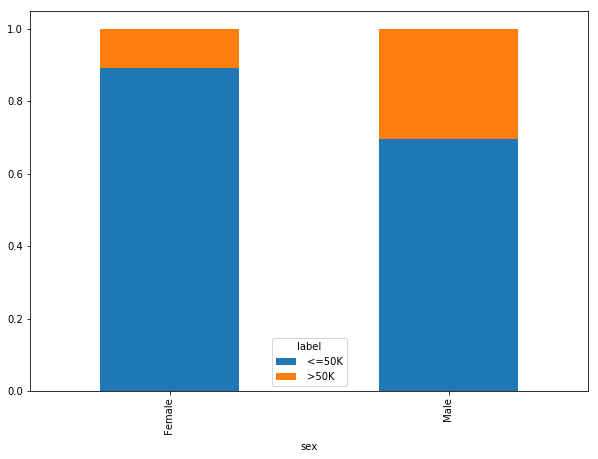

In [18]:
%matplotlib inline
pivot_sex_df_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7))


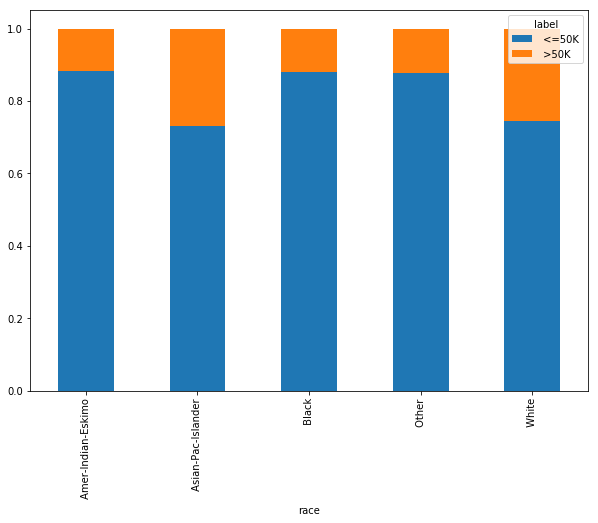

In [19]:
pivot_race_df_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7))


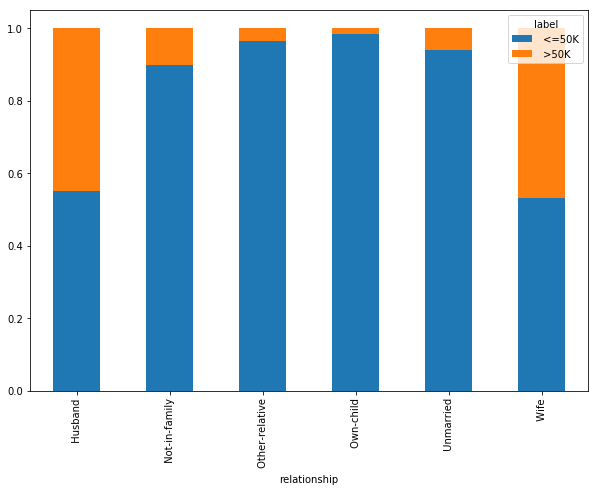

In [20]:
pivot_relationship_df_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7))


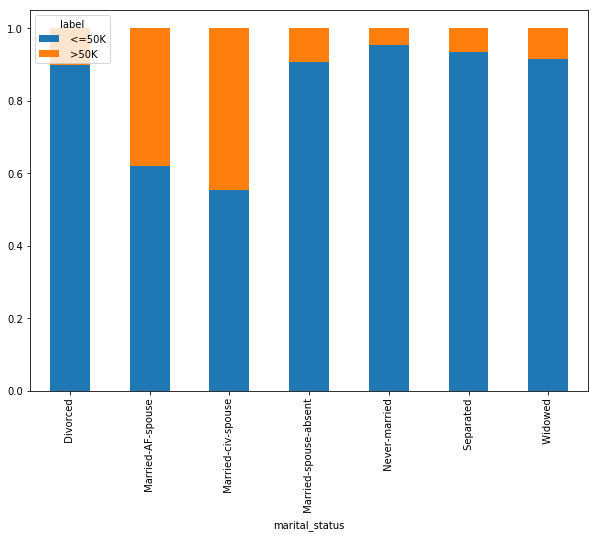

In [21]:
pivot_ms_dff_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7))


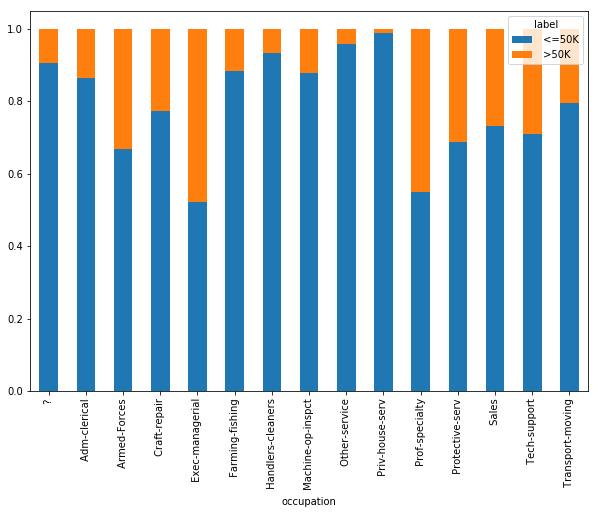

In [22]:
pivot_occ_df_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7))


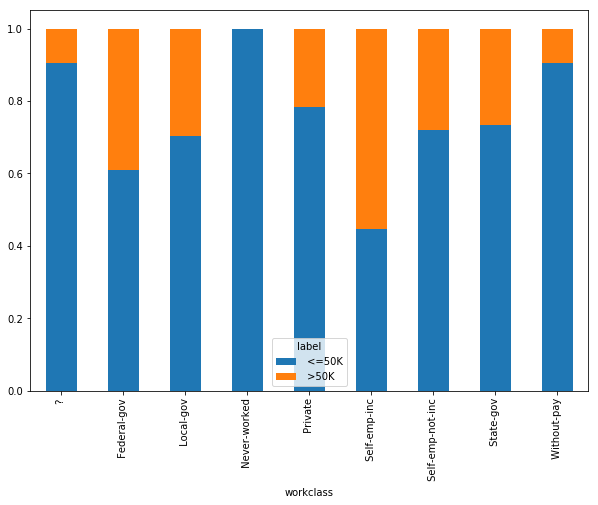

In [23]:
pivot_wc_df_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7))

In [25]:
data.head()

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [26]:
Xdata = data.drop('label', axis =1)
Xdata.head()
data.head()

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [27]:
Ydata = data['label']
Ydata.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: label, dtype: object

In [28]:
Ydata.unique()

array([' <=50K', ' >50K'], dtype=object)

In [29]:
dataY = [ 0 if y.strip() =='<=50K' else 1 for y in Ydata] # strip used to remove leading and trailing whitespace characters such as \n, \r, \t, \f, space.

In [30]:
myset = set(dataY) # Get the unique data from list
myset

{0, 1}

In [31]:
Ydata = pd.Series(x for x in dataY)

In [32]:
Ydata.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [33]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
d = defaultdict(LabelEncoder)

In [34]:
catCol = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country']

In [35]:
df = Xdata.copy(True) # deep copy
df['capitals'] = df['capital_gain']+ df['capital_loss'] # convery capital gain and capital loss to 1
df = df.drop(['capital_gain','capital_loss','fnlwgt'], axis =1) 
df.head()


,Age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,capitals
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,2174.0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,0.0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,0.0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,0.0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,0.0


In [37]:
le = LabelEncoder()

In [38]:
for item in catCol:
    le.fit(df[item])
    df[item]= le.transform(df[item])
    

In [49]:
df.head()

,Age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,capitals
0,39,7,9,13.0,4,1,1,4,1,40.0,39,2174.0
1,50,6,9,13.0,2,4,0,4,1,13.0,39,0.0
2,38,4,11,9.0,0,6,1,4,1,40.0,39,0.0
3,53,4,1,7.0,2,6,0,2,1,40.0,39,0.0
4,28,4,9,13.0,2,10,5,2,0,40.0,5,0.0


In [41]:
Ydata.shape[0]

48842

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df,Ydata,test_size = 0.3)

In [45]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression


logClassifier = LogisticRegression()

In [46]:
logClassifier.fit(x_train,y_train)
train_score = logClassifier.score(x_train,y_train)
test_score = logClassifier.score(x_test,y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.824972944514
Test Score: 0.820241588753


In [50]:
df.head()

,Age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,capitals
0,39,7,9,13.0,4,1,1,4,1,40.0,39,2174.0
1,50,6,9,13.0,2,4,0,4,1,13.0,39,0.0
2,38,4,11,9.0,0,6,1,4,1,40.0,39,0.0
3,53,4,1,7.0,2,6,0,2,1,40.0,39,0.0
4,28,4,9,13.0,2,10,5,2,0,40.0,5,0.0


In [52]:
logClassifier.coef_

array([[  2.51808230e-02,  -6.17622664e-02,  -1.73316813e-03,
          2.85886756e-01,  -2.44738226e-01,   8.62430469e-03,
         -2.08934285e-01,   1.43758572e-02,   6.47293469e-01,
          2.47459742e-02,  -7.76548537e-03,   3.44578139e-04]])

In [62]:
from sklearn.ensemble import RandomForestClassifier
rndTree = RandomForestClassifier()
rndTree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
rndTree.score(x_train,y_train)

0.96498873906812133

In [64]:
rndTree.score(x_test,y_test)

0.84146591141745719

In [65]:
feature_importances = pd.DataFrame(rndTree.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [66]:
feature_importances

,importance
Age,0.239320
capitals,0.155841
hours_per_week,0.115106
relationship,0.111440
occupation,0.084171
education_num,0.079971
marital_status,0.065380
workclass,0.050412
education,0.045628
native_country,0.023041


In [59]:
# Encoding the variable
fit = df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
df = df.apply(lambda x: d[x.name].transform(x))
df = fit.apply(lambda x: d[x.name].inverse_transform(x))
df

TypeError: ("unhashable type: 'list'", 'occurred at index Age')

In [52]:
df['Age'].unique()

array([22, 33, 21, 36, 11, 20, 32, 35, 14, 25, 13,  6, 15, 23, 17,  8, 26,
       37, 18, 42, 39,  2,  3, 28,  5, 31,  4,  7, 40, 27, 24, 12,  1, 30,
       29, 19, 62, 10, 50, 16, 59,  0, 38, 44, 53, 47, 54, 51, 49, 34, 41,
        9, 43, 72, 58, 48, 60, 45, 46, 63, 55, 57, 52, 56, 64, 61, 71, 65,
       66, 67, 68, 69, 70], dtype=int64)

In [44]:
s = pd.Series(list('abcad'))
pd.get_dummies(s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train = ["paris", "paris", "tokyo", "amsterdam"]
test = ["tokyo", "tokyo", "paris"]
le.fit(train).transform(test)

array([2, 2, 1], dtype=int64)

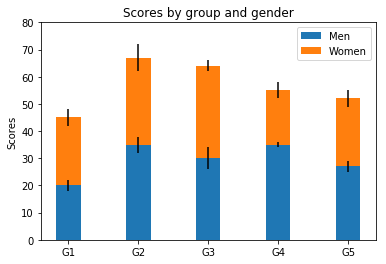

In [5]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()